<a href="https://colab.research.google.com/github/evanjenkins7/CS461/blob/main/Program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [142]:
#***************Uncomment to upload CSV file from computer*****************
#from google.colab import files 
#uploaded = files.upload()


In [143]:
#create dataset from CSV input
dataset = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
dataset.head()
#one-hot code non-numerical values
dataset = pd.get_dummies(dataset, columns=['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course'])
dataset


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [144]:
#separate dataset into 70/15/15 for Train/Test/Validation
train_dataset = dataset.sample(frac=0.7, random_state=42)
rest = dataset.drop(train_dataset.index)
test_dataset = rest.sample(frac=0.5, random_state=42)
validation_dataset = rest.drop(test_dataset.index)

In [145]:
#isolate input and output data into features and labels accordingly
train_features = train_dataset.copy()
test_features = test_dataset.copy()
validation_features = validation_dataset.copy()

math_score = train_features.pop('math score')
reading_score = train_features.pop('reading score')
writing_score = train_features.pop('writing score')
train_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = test_features.pop('math score')
reading_score = test_features.pop('reading score')
writing_score = test_features.pop('writing score')
test_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = validation_features.pop('math score')
reading_score = validation_features.pop('reading score')
writing_score = validation_features.pop('writing score')
validation_labels = np.array([math_score, reading_score, writing_score]).transpose()

In [146]:
#generate normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [147]:
#get model function to create model
def get_model(normalizer):
    model = keras.Sequential(
    [
      normalizer,
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(3, activation="relu"),
    ])
    model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.001))
    return model

In [148]:
#creation of model
model = get_model(normalizer)

#train model
history = model.fit(
    train_features,
    train_labels,
    validation_data=(validation_features, validation_labels),
    epochs=100,
    verbose=0)

history.history

{'loss': [66.7801742553711,
  65.05060577392578,
  61.128135681152344,
  53.18280792236328,
  38.93397903442383,
  20.322433471679688,
  12.508922576904297,
  11.2166166305542,
  10.915237426757812,
  10.719075202941895,
  10.604684829711914,
  10.46430492401123,
  10.407505989074707,
  10.256670951843262,
  10.189329147338867,
  10.141355514526367,
  10.045159339904785,
  9.994709014892578,
  9.954854965209961,
  9.93299674987793,
  9.909984588623047,
  9.843745231628418,
  9.787032127380371,
  9.784703254699707,
  9.79450511932373,
  9.759675979614258,
  9.71318244934082,
  9.724973678588867,
  9.668959617614746,
  9.681835174560547,
  9.681962013244629,
  9.602933883666992,
  9.629227638244629,
  9.580097198486328,
  9.558314323425293,
  9.54980182647705,
  9.604694366455078,
  9.543707847595215,
  9.504341125488281,
  9.47220516204834,
  9.467863082885742,
  9.463522911071777,
  9.464753150939941,
  9.444072723388672,
  9.480348587036133,
  9.44461727142334,
  9.43740463256836,
  9

In [149]:
#evaluate mean average error and predictions
mae = model.evaluate(test_features, test_labels, verbose=0)

mae 


10.726845741271973

In [150]:
#create predictions
test_predictions = model.predict(test_features)

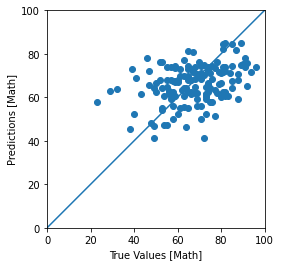

In [151]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[0], test_predictions.transpose()[0])
plt.xlabel('True Values [Math]')
plt.ylabel('Predictions [Math]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

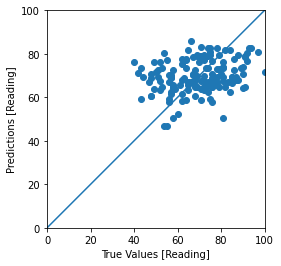

In [152]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[1], test_predictions.transpose()[1])
plt.xlabel('True Values [Reading]')
plt.ylabel('Predictions [Reading]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

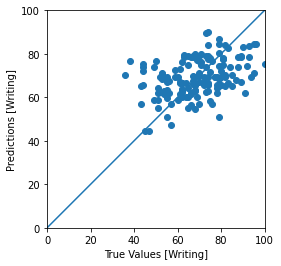

In [153]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[2], test_predictions.transpose()[2])
plt.xlabel('True Values [Writing]')
plt.ylabel('Predictions [Writing]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)